In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
gps = pd.read_csv('gps_fixes.csv')
loan = pd.read_csv('loan_outcomes.csv')
user = pd.read_csv('user_attributes.csv')

In [67]:
gps.head()

,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
0,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.4,0.0,0.0,fused,1
1,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.0,0.0,0.0,fused,1
2,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.4,0.0,0.0,fused,1
3,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.0,0.0,0.0,fused,1
4,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.0,0.0,0.0,fused,1


In [68]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26710 entries, 0 to 26709
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gps_fix_at         26710 non-null  object 
 1   server_upload_at   26710 non-null  object 
 2   longitude          26710 non-null  float64
 3   latitude           26710 non-null  float64
 4   accuracy           26710 non-null  float64
 5   altitude           26710 non-null  float64
 6   bearing            26710 non-null  float64
 7   location_provider  26710 non-null  object 
 8   user_id            26710 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 1.8+ MB


In [69]:
gps.describe()

,longitude,latitude,accuracy,altitude,bearing,user_id
count,26710.000000,26710.000000,2.671000e+04,26710.000000,26710.000000,26710.000000
mean,36.503743,-1.031422,1.006282e+03,332.259644,15.072195,194.645938
std,4.172315,1.850920,1.905380e+04,646.512069,57.378467,108.631662
min,-85.232791,-24.645763,-2.147463e+06,-161.700000,-1.000000,1.000000
25%,36.163351,-1.299535,2.050250e+01,0.000000,0.000000,103.000000
50%,36.825058,-1.232870,1.100000e+02,0.000000,0.000000,191.000000
75%,36.950463,-0.402338,2.200000e+03,0.000000,0.000000,278.000000
max,117.058355,56.242041,6.451553e+05,3012.900000,359.440000,400.000000


In [131]:
gps["location_provider"].nunique()

4

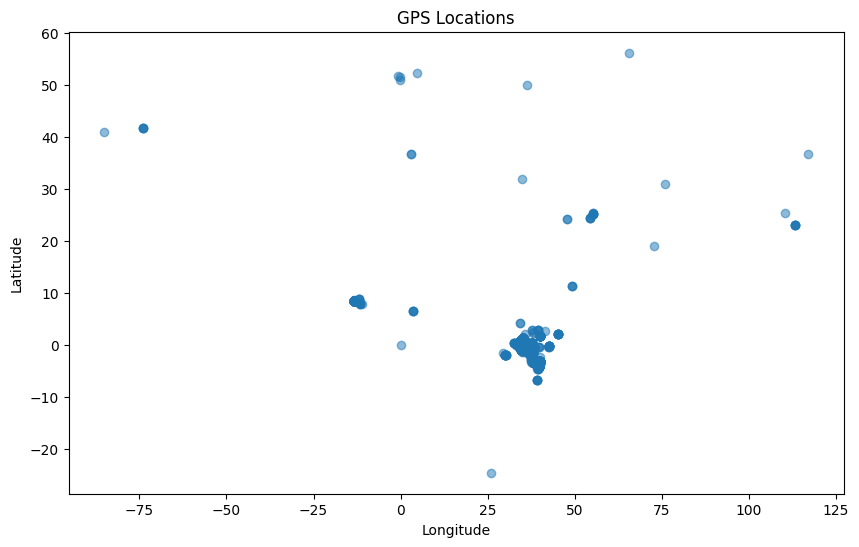

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(gps['longitude'], gps['latitude'], alpha=0.5)
plt.title('GPS Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [71]:
loan.head()

,user_id,application_at,loan_outcome
0,1,2017-08-14 09:08:50.000000,defaulted
1,2,2016-05-17 10:10:12.447976,repaid
2,3,2016-10-20 10:07:20.459081,defaulted
3,4,2017-01-13 13:03:34.000000,defaulted
4,5,2016-11-03 15:41:39.124610,repaid


In [72]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         400 non-null    int64 
 1   application_at  400 non-null    object
 2   loan_outcome    400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [73]:
loan.describe()

,user_id
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


In [74]:
user.head()

,user_id,age,cash_incoming_30days
0,1,42,8988.12
1,2,36,9968.12
2,3,27,59.04
3,4,38,2129.03
4,5,33,2102.53


In [75]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               400 non-null    int64  
 1   age                   400 non-null    int64  
 2   cash_incoming_30days  400 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


In [76]:
user.describe()

,user_id,age,cash_incoming_30days
count,400.000000,400.000000,400.000000
mean,200.500000,36.487500,7896.301075
std,115.614301,13.243236,7037.481340
min,1.000000,18.000000,11.900000
25%,100.750000,27.000000,2602.472500
50%,200.500000,34.000000,6004.240000
75%,300.250000,44.000000,10989.405000
max,400.000000,105.000000,41657.810000


In [132]:
df_new = loan.merge(user, on='user_id', how='left').merge(gps, on='user_id', how='left')


df_new['outcome_bin'] = (df_new['loan_outcome'] == 'repaid').astype(int)


print(df_new.groupby('loan_outcome')['user_id'].count())




loan_outcome
defaulted     9068
repaid       17670
Name: user_id, dtype: int64


In [135]:
df_new.corr()['outcome_bin'].sort_values(ascending=False)

outcome_bin             1.000000
cash_incoming_30days    0.239028
altitude                0.155969
age                     0.098032
latitude                0.086343
bearing                 0.038509
accuracy               -0.013842
longitude              -0.065113
user_id                -0.102659
Name: outcome_bin, dtype: float64

In [136]:
df_new[['age','cash_incoming_30days','accuracy','altitude','bearing','outcome_bin']].corr()

,age,cash_incoming_30days,accuracy,altitude,bearing,outcome_bin
age,1.000000,-0.104769,0.006237,-0.133848,-0.053965,0.098032
cash_incoming_30days,-0.104769,1.000000,-0.002998,0.161990,0.088143,0.239028
accuracy,0.006237,-0.002998,1.000000,-0.026186,-0.013778,-0.013842
altitude,-0.133848,0.161990,-0.026186,1.000000,0.427142,0.155969
bearing,-0.053965,0.088143,-0.013778,0.427142,1.000000,0.038509
outcome_bin,0.098032,0.239028,-0.013842,0.155969,0.038509,1.000000


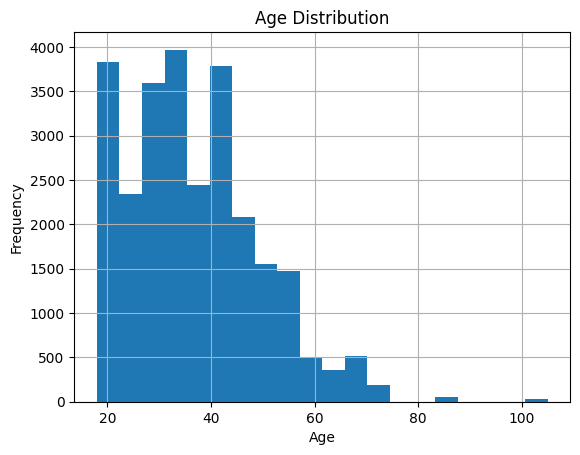

In [137]:

df_new['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [138]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_check = ['age', 'cash_incoming_30days', 'accuracy', 'altitude', 'bearing']
df_new = remove_outliers(df_new, columns_to_check)



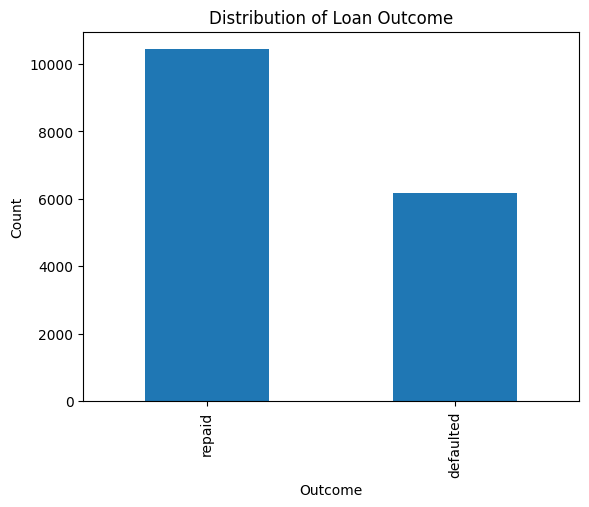

In [139]:
df_new['loan_outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show();

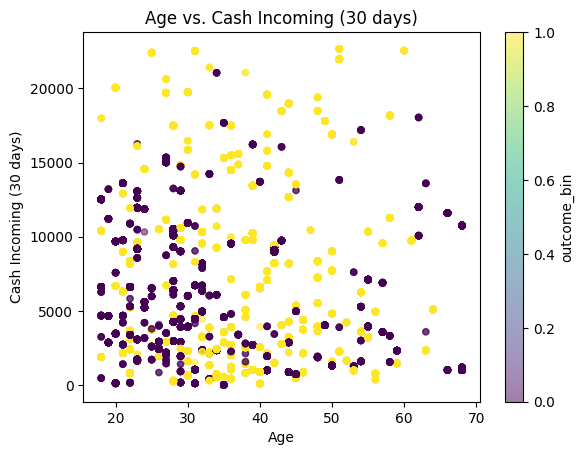

In [140]:
df_new.plot.scatter(x='age', y='cash_incoming_30days', alpha=0.5 , c= 'outcome_bin', cmap='viridis')
plt.title('Age vs. Cash Incoming (30 days)')
plt.xlabel('Age')
plt.ylabel('Cash Incoming (30 days)')
plt.show()

<Figure size 1200x800 with 0 Axes>

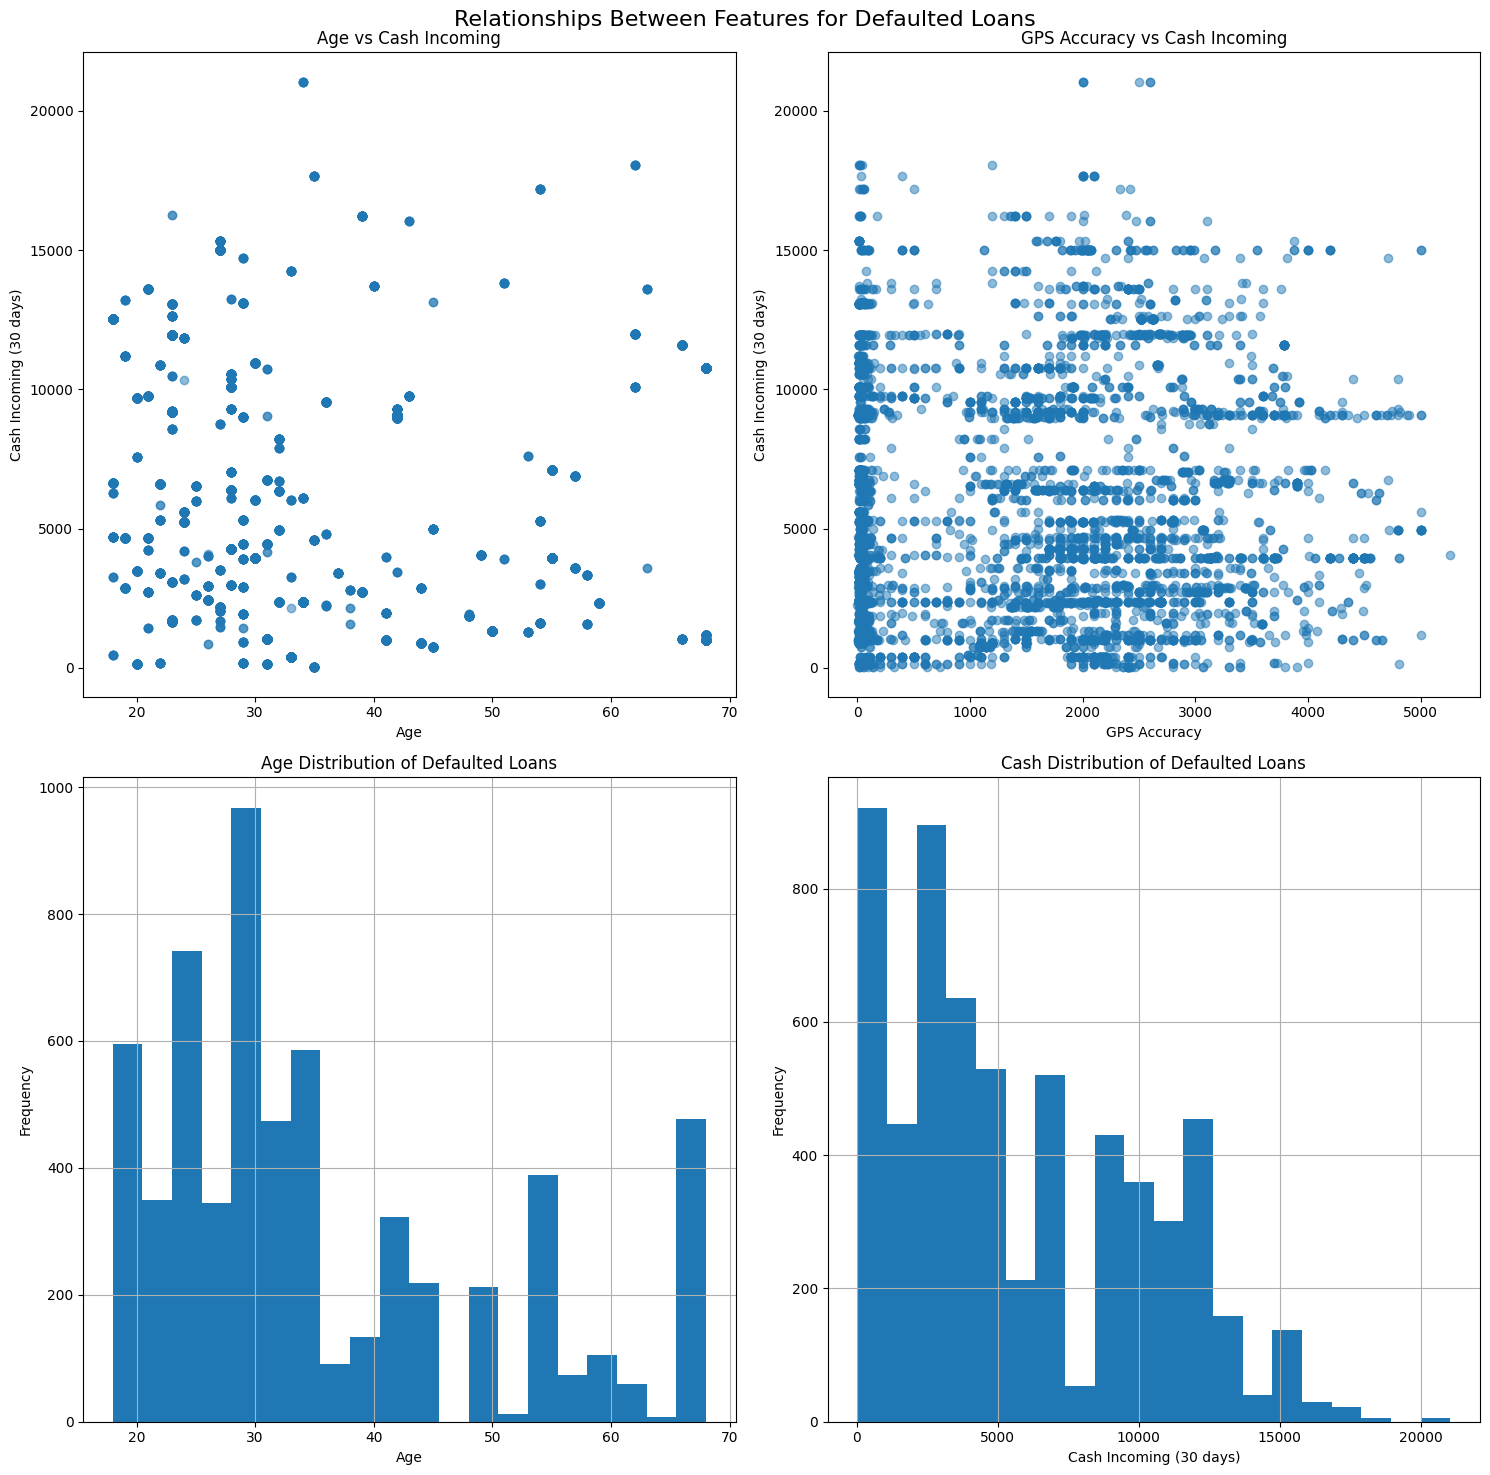

In [141]:

defaulted = df_new[df_new['loan_outcome'] == 'defaulted']


plt.figure(figsize=(12, 8))


fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Relationships Between Features for Defaulted Loans', fontsize=16)

# Plot 1: Age vs Cash Incoming
axes[0, 0].scatter(defaulted['age'], defaulted['cash_incoming_30days'], alpha=0.5)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Cash Incoming (30 days)')
axes[0, 0].set_title('Age vs Cash Incoming')

# Plot 2: Accuracy vs Cash Incoming
axes[0, 1].scatter(defaulted['accuracy'], defaulted['cash_incoming_30days'], alpha=0.5)
axes[0, 1].set_xlabel('GPS Accuracy')
axes[0, 1].set_ylabel('Cash Incoming (30 days)')
axes[0, 1].set_title('GPS Accuracy vs Cash Incoming')

# Plot 3: Distribution of Age
defaulted['age'].hist(bins=20, ax=axes[1, 0])
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Age Distribution of Defaulted Loans')

# Plot 4: Distribution of Cash Incoming
defaulted['cash_incoming_30days'].hist(bins=20, ax=axes[1, 1])
axes[1, 1].set_xlabel('Cash Incoming (30 days)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Cash Distribution of Defaulted Loans')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

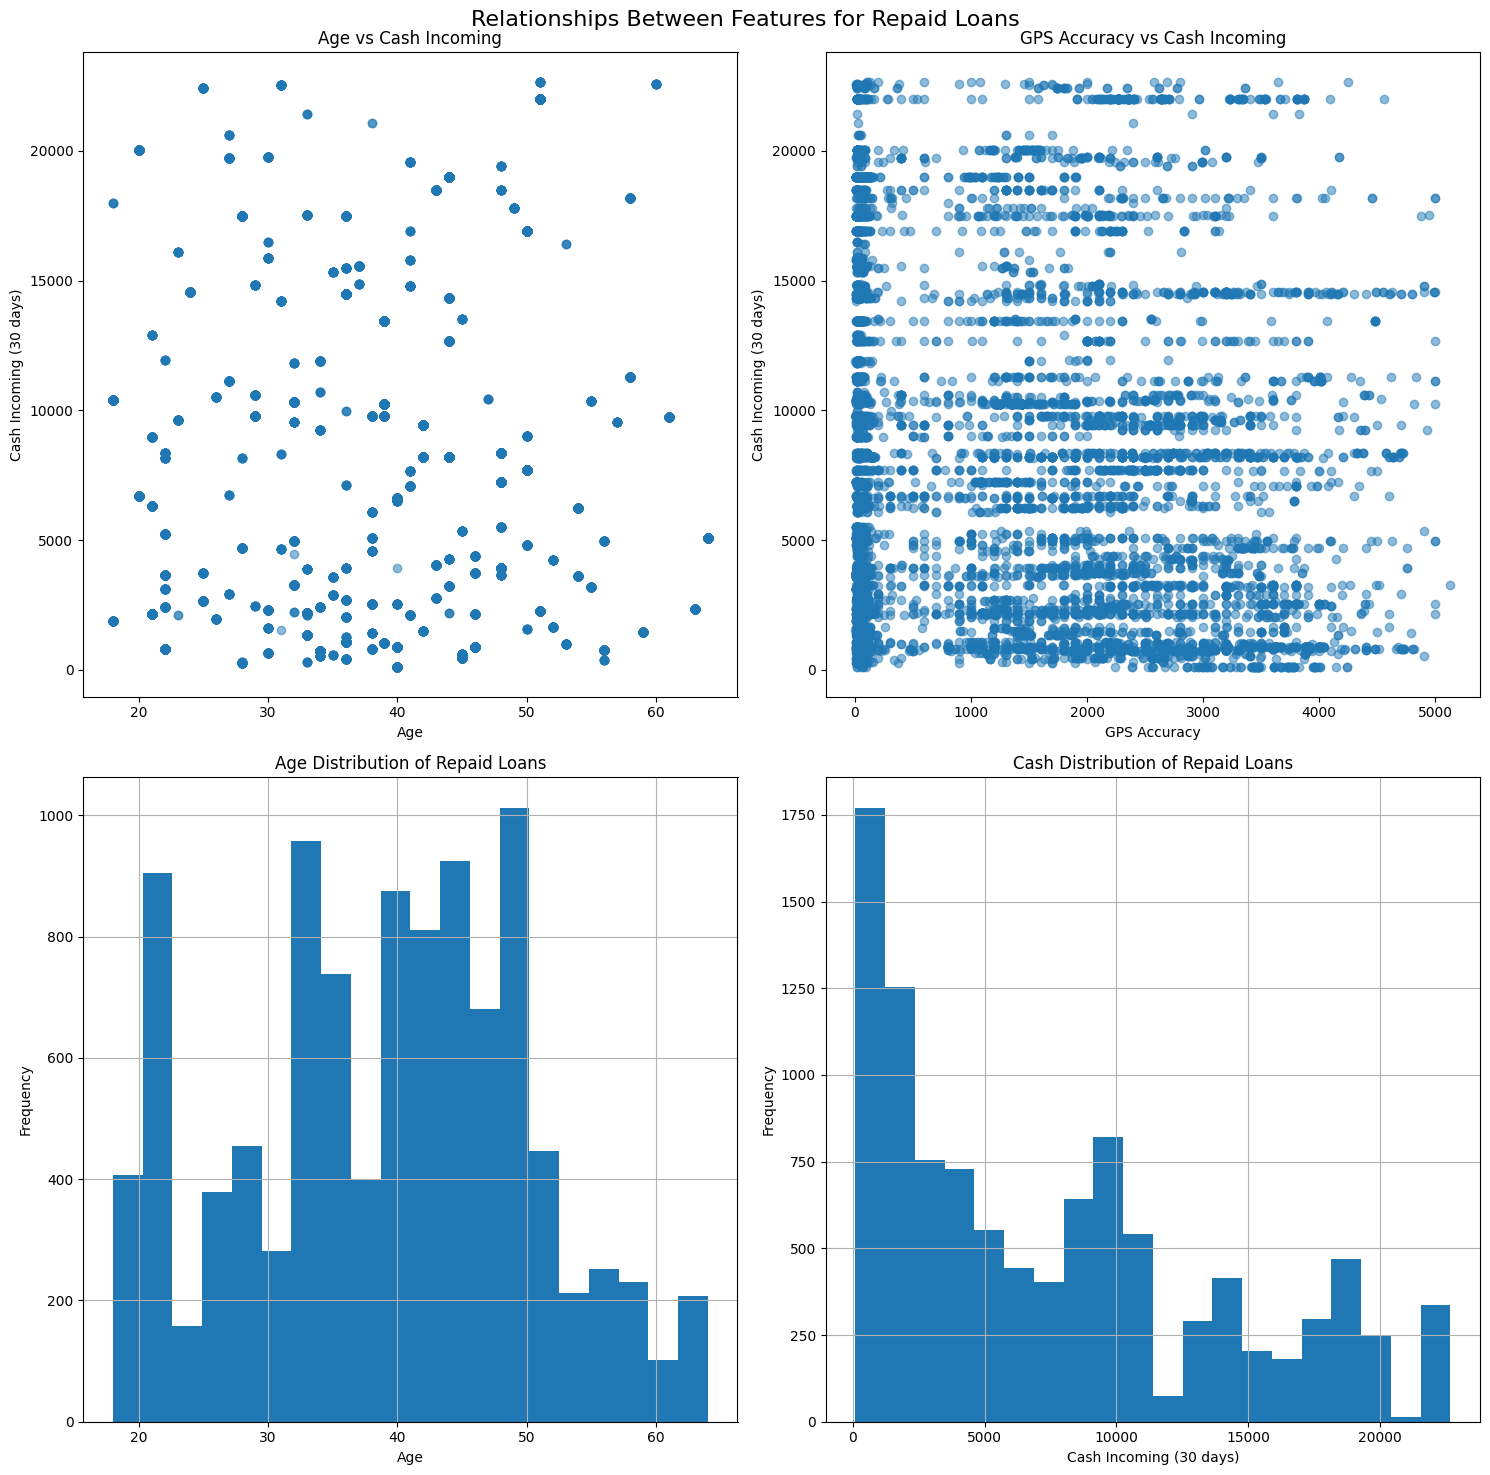

In [142]:

defaulted = df_new[df_new['loan_outcome'] != 'defaulted']


plt.figure(figsize=(12, 8))


fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Relationships Between Features for Repaid Loans', fontsize=16)

# Plot 1: Age vs Cash Incoming
axes[0, 0].scatter(defaulted['age'], defaulted['cash_incoming_30days'], alpha=0.5)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Cash Incoming (30 days)')
axes[0, 0].set_title('Age vs Cash Incoming')

# Plot 2: Accuracy vs Cash Incoming
axes[0, 1].scatter(defaulted['accuracy'], defaulted['cash_incoming_30days'], alpha=0.5)
axes[0, 1].set_xlabel('GPS Accuracy')
axes[0, 1].set_ylabel('Cash Incoming (30 days)')
axes[0, 1].set_title('GPS Accuracy vs Cash Incoming')

# Plot 3: Distribution of Age
defaulted['age'].hist(bins=20, ax=axes[1, 0])
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Age Distribution of Repaid Loans')

# Plot 4: Distribution of Cash Incoming
defaulted['cash_incoming_30days'].hist(bins=20, ax=axes[1, 1])
axes[1, 1].set_xlabel('Cash Incoming (30 days)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Cash Distribution of Repaid Loans')

plt.tight_layout()
plt.show()

In [143]:
df_new.head()

,user_id,application_at,loan_outcome,age,cash_incoming_30days,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,outcome_bin
0,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.4,0.0,0.0,fused,0
1,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.0,0.0,0.0,fused,0
2,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.4,0.0,0.0,fused,0
3,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.0,0.0,0.0,fused,0
4,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.0,0.0,0.0,fused,0


In [144]:
df_new.isna().sum()

user_id                 0
application_at          0
loan_outcome            0
age                     0
cash_incoming_30days    0
gps_fix_at              0
server_upload_at        0
longitude               0
latitude                0
accuracy                0
altitude                0
bearing                 0
location_provider       0
outcome_bin             0
dtype: int64

In [145]:
df_new['app_time'] = pd.to_datetime(df_new['application_at'])
df_new['app_month'] = df_new['app_time'].dt.month
df_new['age_group'] = pd.cut(df_new['age'], bins=[17, 25, 35, 45, 60, 100], labels=['18-25', '26-35', '36-45', '46-60', '60+'])
df_new['cash_incoming_category'] = pd.qcut(df_new['cash_incoming_30days'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df_new['week_day'] = df_new['app_time'].dt.dayofweek
df_new['cash_incoming_per_age'] = df_new['cash_incoming_30days'] / df_new['age']


In [146]:
df_new[['age','cash_incoming_30days','accuracy','altitude','bearing','outcome_bin']].corr()

,age,cash_incoming_30days,accuracy,altitude,bearing,outcome_bin
age,1.000000,-0.014671,0.044879,NaN,NaN,0.135563
cash_incoming_30days,-0.014671,1.000000,-0.096171,NaN,NaN,0.158287
accuracy,0.044879,-0.096171,1.000000,NaN,NaN,-0.074864
altitude,NaN,NaN,NaN,NaN,NaN,NaN
bearing,NaN,NaN,NaN,NaN,NaN,NaN
outcome_bin,0.135563,0.158287,-0.074864,NaN,NaN,1.000000


In [147]:
df_new.head()

,user_id,application_at,loan_outcome,age,cash_incoming_30days,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,outcome_bin,app_time,app_month,age_group,cash_incoming_category,week_day,cash_incoming_per_age
0,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.4,0.0,0.0,fused,0,2017-08-14 09:08:50,8,36-45,High,0,214.002857
1,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.0,0.0,0.0,fused,0,2017-08-14 09:08:50,8,36-45,High,0,214.002857
2,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.4,0.0,0.0,fused,0,2017-08-14 09:08:50,8,36-45,High,0,214.002857
3,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.0,0.0,0.0,fused,0,2017-08-14 09:08:50,8,36-45,High,0,214.002857
4,1,2017-08-14 09:08:50.000000,defaulted,42,8988.12,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.0,0.0,0.0,fused,0,2017-08-14 09:08:50,8,36-45,High,0,214.002857


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [149]:

le = LabelEncoder()
df_new['loan_outcome_enc'] = le.fit_transform(df_new['loan_outcome'])

X = df_new[['cash_incoming_30days', 'accuracy', 'altitude', 'bearing', 
                    'cash_incoming_per_age', 'app_month', 
                    'week_day', 'age_group', 'cash_incoming_category', 'location_provider']]

y = df_new['loan_outcome_enc']

numeric_features = ['cash_incoming_30days', 'accuracy', 'altitude', 'bearing',
                    'cash_incoming_per_age', 'app_month', 'week_day']
categorical_features = ['age_group', 'cash_incoming_category','location_provider' ]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}



In [150]:

results = []
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    results.append({'Classifier': name, 'Accuracy': acc, 'ROC AUC': roc})

results_df = pd.DataFrame(results)
print(results_df)

best_model_info = max(results, key=lambda x: x['ROC AUC'])
best_model = classifiers[best_model_info['Classifier']]
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

               Classifier  Accuracy   ROC AUC
0     Logistic Regression  0.738777  0.781720
1  Support Vector Machine  0.897560  0.937224
2    Gaussian Naive Bayes  0.371799  0.763915
3           Random Forest  0.999096  0.999999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1234
           1       1.00      1.00      1.00      2085

    accuracy                           1.00      3319
   macro avg       1.00      1.00      1.00      3319
weighted avg       1.00      1.00      1.00      3319



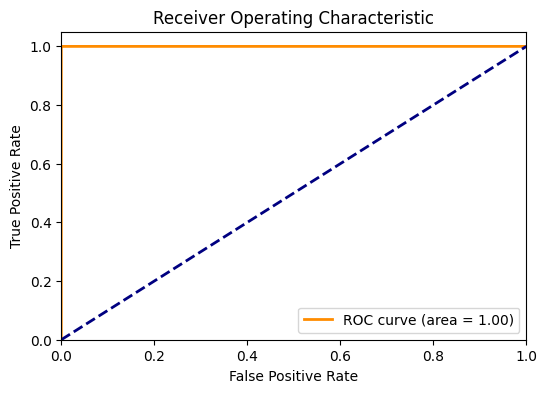

In [152]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

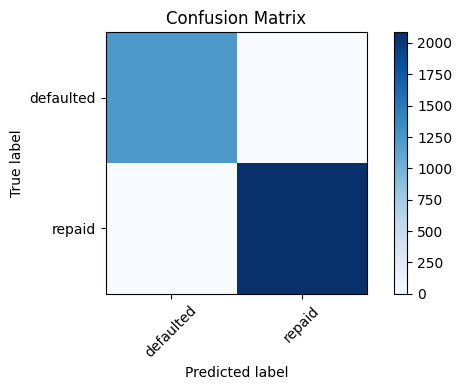

In [153]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_, rotation=45)
plt.yticks(tick_marks, le.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [155]:
import joblib
joblib.dump(best_model, 'loan_prediction_model.joblib')



['loan_prediction_model.joblib']

## API USAGE

In [157]:
class LoanPredictionAPI:
    def __init__(self, model_path='loan_prediction_model.joblib'):
       
        self.model = joblib.load(model_path)
        self.preprocessor = preprocessor 
        
    def _prepare_features(self, user_data):
        """Prepare features in the correct format for model prediction"""
        required_features = ['cash_incoming_30days', 'accuracy', 'altitude', 'bearing', 
                           'cash_incoming_per_age', 'app_month', 'week_day', 
                           'age_group', 'cash_incoming_category', 'location_provider']
        
     
        for feature in required_features:
            if feature not in user_data:
                raise ValueError(f"Missing required feature: {feature}")
                
      
        if not isinstance(user_data, pd.DataFrame):
            user_data = pd.DataFrame([user_data])
            
        return user_data[required_features]
    
    def predict_by_user_id(self, user_id):
        """Make prediction using user ID"""
       
        user_data = df_new[df_new['user_id'] == user_id].iloc[0:1]
        
        if user_data.empty:
            raise ValueError(f"User ID {user_id} not found")
            
        return self.predict(user_data)
    
    def predict(self, user_data):
        """Make prediction using raw user data"""
        try:
          
            X = self._prepare_features(user_data)
            
         
            X_transformed = self.preprocessor.transform(X)
            
       
            prediction_prob = self.model.predict_proba(X_transformed)[0]
            prediction = self.model.predict(X_transformed)[0]
            
            return {
                'prediction': 'repaid' if prediction == 1 else 'defaulted',
                'probability': float(prediction_prob[1]), 
                'status': 'success'
            }
            
        except Exception as e:
            return {
                'status': 'error',
                'message': str(e)
            }


api = LoanPredictionAPI()

# Predict by user ID
prediction = api.predict_by_user_id(1)
print(prediction)

# Predict with raw data
new_user_data = {
    'cash_incoming_30days': 5000.0,
    'accuracy': 50.0,
    'altitude': 0.0,
    'bearing': 0.0,
    'cash_incoming_per_age': 125.0,
    'app_month': 8,
    'week_day': 3,
    'age_group': '26-35',
    'cash_incoming_category': 'Medium',
    'location_provider': 'fused'
}
prediction = api.predict(new_user_data)
print(prediction)

{'prediction': 'defaulted', 'probability': 0.01, 'status': 'success'}
{'prediction': 'repaid', 'probability': 0.58, 'status': 'success'}
